Medical Cost Data

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

Veri setini link uzeerinden direkt okuyabiliriz bu sekilde

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["smoker"] , insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

Goruldugu gibi bazi veriler numerik iken bazilari degil. Tum verilerimizi numerik degerlere yapmaliyiz.(numeric encoding)

**One-Hot Encoding**

[Nasil biseye benzeniyor](https://i.imgur.com/mtimFxh.png)
kullanalim be gorelim

In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


Features and Labels

In [5]:
X = insurance_one_hot.drop("charges",axis=1) #charges coloumsu haric hepsi
y = insurance_one_hot["charges"] #charges coloumsu

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Train ve Test kumelerini hazirlayalim

In [8]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


indexlerden de gordugunuz gibi data siralamalari rastgele karistirilimis sekilde 

### Modeli olusturalim

In [ ]:
#create a model
insurance_model = tf.keras.Sequential([ 
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"]
                        )

#fit the model
insurance_model.fit(X_train, y_train, epochs= 100)


In [12]:
#sonuclari test kumesinde test edelim
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7286.3384 - mae: 7286.3384


[7286.33837890625, 7286.33837890625]

Modelimizin performansi iyi cikmadi bu yuzden gelsitirmeyi deneyelim

2 farkli yol deneyelim

1. Ekstra gizli katman ekleyelim ve optimizeri Adam olarak degistirelim
2. Daha uzun surede egitmeye calisalim

In [15]:
#create a model
insurance_model_2 = tf.keras.Sequential([ 
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(),#optimizeri da degistirmis olduk
                        metrics= ["mae"]
                        )

#fit the model
insurance_model_2.fit(X_train, y_train, epochs= 100,verbose= 0)

In [16]:
#sonuclari test kumesinde test edelim
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5104.4990 - mae: 5104.4990


[5104.4990234375, 5104.4990234375]

Goruldugu gibi modelimizin performansi gelisti

Daha uzun surede egitmeyi deneyelim epochs = 200

In [21]:
#create a model
insurance_model_3 = tf.keras.Sequential([ 
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(),#optimizeri da degistirmis olduk
                        metrics= ["mae"]
                        )

#fit the model
history = insurance_model_3.fit(X_train, y_train, epochs= 200,verbose= 0)


In [22]:
#sonuclari test kumesinde test edelim
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.4319 - mae: 3492.4319


[3492.431884765625, 3492.431884765625]

Modelim epochs sayisini 200 yaptigimizda daha da iyi bir performansa ulasmis oldu.

Modelimizin epochs(donem) boyunca gelisimine bakalim



Text(0.5, 0, 'epochs')

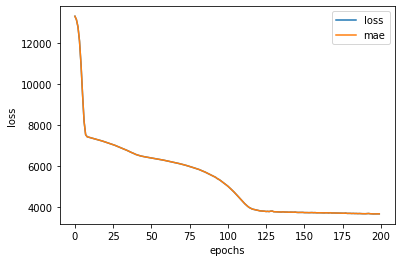

In [24]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Peki modeli ne kadar sure egitmeliyiz en ideal epoch sayisini nedir ?

Bu uzerinde calistiginiz probleme gore degisiklik gostermektedir. Bu yuzden Tensorflow un bu konudaki bir cozumu olarak EarlyStopping yani erken durdurmayi kullanabilirsiniz.

EarlyStopping modelimizin gelsiimi belirli bir seviyeye geldiginde veya artik gelismeyi durdurdugunda egitmimizi epoch sayimiza ulasmadan erken durdurmamaizi saglar.

##Preporccessing Data (normalization and standardization)

Normalization

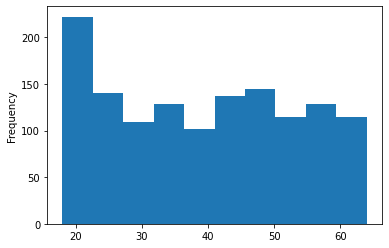

In [25]:
X["age"].plot(kind= "hist")

Yas verilerini inceledik peki bunlarin hepsini 0-1 arasinda degerlere karsilik olarak sikistirsaydik. Iste buna normalization denir.

In [26]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#tekrar datamizi alalim
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer(sutunlar icin transformer olusturalim )
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]), #tum degerler 0-1 arasina sikistirdik
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker", "region"])
)

#X and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

#fit column transformer to our training data
ct.fit(X_train)

X_train_normal =ct.transform(X_train)
X_test_normal =ct.transform(X_test)

Nasil gorundugune bir bakalim

In [29]:
X_train.loc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object

In [30]:
X_train_normal[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

Tum bu islemden sonra tekrar modelimiz fit edelim

In [33]:
#create a model
insurance_model_4 = tf.keras.Sequential([ 
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_4.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(),#optimizeri da degistirmis olduk
                        metrics= ["mae"]
                        )

#fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs= 100,verbose= 0)


In [34]:
#sonuclari test kumesinde test edelim
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.5945 - mae: 3440.5945


[3440.594482421875, 3440.594482421875]

Datamızı normalıze etmeden onceki ayni modelimizdeki sonucla arasindaki farki gorebiliyoruz

In [ ]:
#9/9 [==============================] - 0s 2ms/step - loss: 5104.4990 - mae: 5104.4990
[5104.4990234375, 5104.4990234375]